<a href="https://colab.research.google.com/github/nishitag21/QuantInsti/blob/main/newsubmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [3]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
from math import sqrt
import matplotlib.pyplot as plt

In [27]:
start = '2019-05-01'
end = '2021-08-01'

In [28]:
symbol = 'HINDUNILVR.NS'

In [29]:
df = yf.download(symbol, start, end)

[*********************100%***********************]  1 of 1 completed


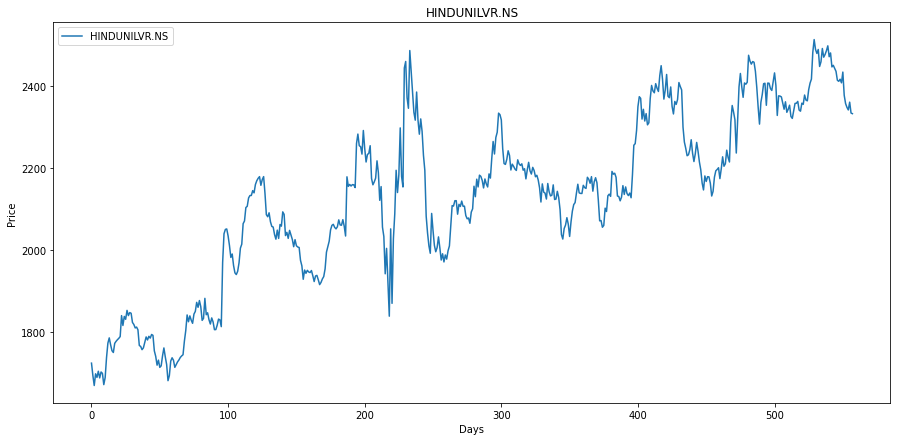

In [30]:
series = df['Close']
series.index = np.arange(series.shape[0])

plt.figure(figsize=(15, 7))
plt.title(symbol)

plt.xlabel('Days')
plt.ylabel('Price')

plt.plot(series, label=symbol)

plt.legend()
plt.show()

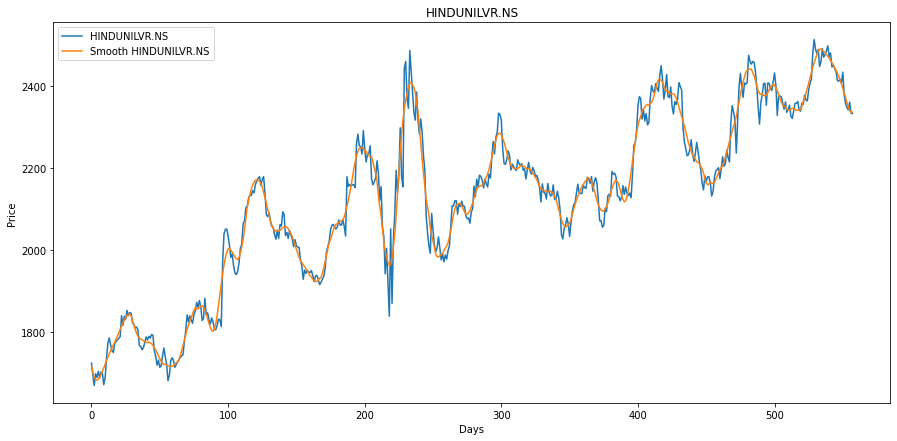

In [31]:
from scipy.signal import savgol_filter

# To find amount of data in months
month_diff = series.shape[0] // 30
# We need value to be greater than 0
if month_diff == 0:
    month_diff = 1

# Algo to determine smoothness
smooth = int(2 * month_diff + 3)

# Smooth price data
points = savgol_filter(series, smooth,7 )

# Plot the smooth price graph over default price graph
plt.figure(figsize=(15,7))
plt.title(symbol)

plt.xlabel('Days')
plt.ylabel('Price')

# Close price data
plt.plot(series, label=symbol)

# Smooth close price data
plt.plot(points, label=f'Smooth {symbol}')

plt.legend()
plt.show()

In [32]:
# Pythagoras function to calculate distance between two points
def pythg(pt1, pt2):
    a_sq = (pt2[0] - pt1[0]) ** 2
    b_sq = (pt2[1] - pt1[1]) ** 2
    return sqrt(a_sq + b_sq)


# Function to calculate local minima and maxima points
def loc_min_max(points):
    loc_minima = []
    loc_maxima = []
    prev_pts = [(0, points[0]), (1, points[1])]
    for i in range(1, len(points) - 1):
        append_to = ''
        if points[i-1] > points[i] < points[i+1]:
            append_to = 'min'
        elif points[i-1] < points[i] > points[i+1]:
            append_to = 'max'
        if append_to:
            if loc_minima or loc_maxima:
                prev_distance = pythg(prev_pts[0], prev_pts[1]) * 0.5
                curr_distance = pythg(prev_pts[1], (i, points[i]))
                if curr_distance >= prev_distance:
                    prev_pts[0] = prev_pts[1]
                    prev_pts[1] = (i, points[i])
                    if append_to == 'min':
                        loc_minima.append((i, points[i]))
                    else:
                        loc_maxima.append((i, points[i]))
            else:
                prev_pts[0] = prev_pts[1]
                prev_pts[1] = (i, points[i])
                if append_to == 'min':
                    loc_minima.append((i, points[i]))
                else:
                    loc_maxima.append((i, points[i]))
                    
    return loc_minima, loc_maxima

# Store the local minima and maxima points
loc_minima, loc_maxima = loc_min_max(points)
minima_pts = np.array(loc_minima)
maxima_pts = np.array(loc_maxima)

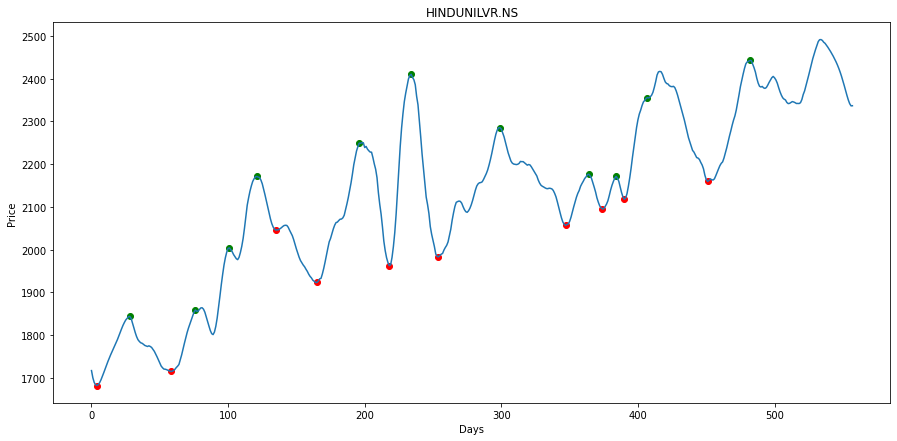

In [33]:
plt.figure(figsize=(15,7))
plt.title(symbol)

plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(points, label=f'Smooth {symbol}')
plt.scatter(minima_pts[:,0],minima_pts[:, 1], color="red")
plt.scatter(maxima_pts[:,0],maxima_pts[:, 1], color="green")
